# PIZZA SALES ANALYSIS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

### IMPORT RAW DATA

In [13]:
pf = pd.read_excel(
    r"C:\Users\praja\OneDrive\Desktop\Data analyst datasets & projects\SQL+PowerBI+Python+Excel+Tableau (8Hr)\pizza_sales_excel_file.xlsx"
)


### METADATA OF RAW DATA

In [20]:
pf.head(6)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6,2,thai_ckn_l,1,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza


In [19]:
pf.tail(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [28]:
print("METADATA OF Dataset: ", pf.shape)

METADATA OF Dataset:  (48620, 12)


In [30]:
print("Rows of Dataset: ", pf.shape[0])

Rows of Dataset:  48620


In [31]:
print("Columns of Dataset: ", pf.shape[1])

Columns of Dataset:  12


In [32]:
pf.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [35]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [36]:
pf.info

<bound method DataFrame.info of        pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1 2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2             3         2  five_cheese_l         1 2015-01-01   11:57:40   
3             4         2    ital_supr_l         1 2015-01-01   11:57:40   
4             5         2     mexicana_m         1 2015-01-01   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1 2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1 2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1 2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_categor

# DATA TYPES IN RAW DATA

In [38]:
pf.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [39]:
pf.describe()

,pizza_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


# KPI's

In [54]:
total_revenue = pf['total_price'].sum()
total_pizza_sold = pf['quantity'].sum()
total_orders = pf['order_id'].nunique()
avg_order_value = total_revenue / total_orders
avg_pizzas_per_order = total_pizza_sold / total_orders

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"total_pizza_sold: {total_pizza_sold:,}")
print(f"total_orders: {total_orders:,}")
print(f"avg_order_value: ${avg_order_value:,.2f}")
print(f"avg_pizzas_per_order: {avg_pizzas_per_order:,.2f}")


Total Revenue: $817,860.05
total_pizza_sold: 49,574
total_orders: 21,350
avg_order_value: $38.31
avg_pizzas_per_order: 2.32


# Chart's


### Ingredient Analysis


In [62]:
ingredient = (
                pf['pizza_ingredients']
                .str.split(',')
                .explode()
                .str.strip()
                .value_counts()
                .reset_index()
                .rename(columns={'index':'Ingredients','pizza_ingredients':'counts'})
)
print(ingredient.head(5))


              counts  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333


# Daily Trend - Total Orders


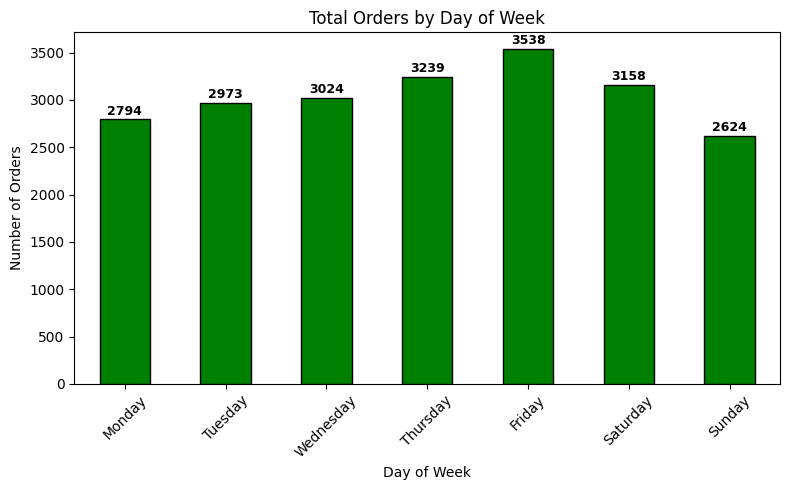

In [71]:
pf['order_date'] = pd.to_datetime(pf['order_date'], dayfirst=True)

pf['day_name'] = pf ['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pf['day_name'] = pd. Categorical(pf['day_name'], categories=weekday_order, ordered=True)

orders_by_day = pf.groupby('day_name', observed=False) ['order_id'].nunique()

ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='green', edgecolor='black')

plt.title("Total Orders by Day of Week")

plt.xlabel("Day of Week")

plt.ylabel("Number of Orders")

plt.xticks (rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
    
plt.tight_layout()

plt.show()

# Daily Trend - Total Revenue


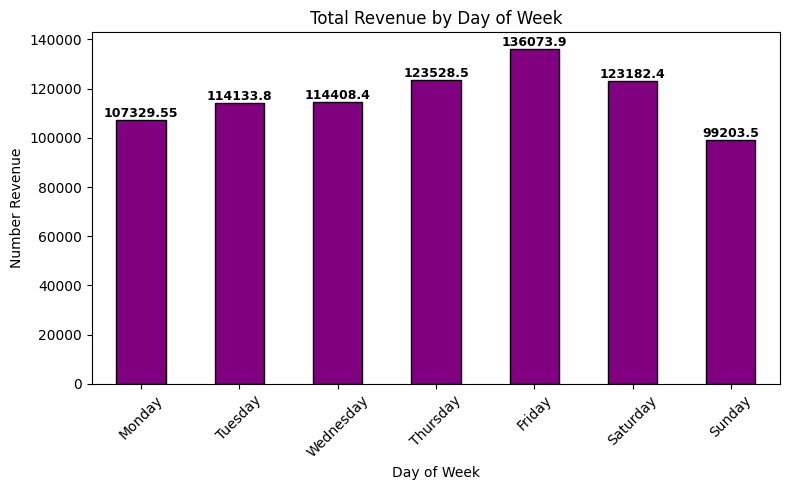

In [72]:
pf['order_date'] = pd.to_datetime(pf['order_date'], dayfirst=True)

pf['day_name'] = pf ['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pf['day_name'] = pd. Categorical(pf['day_name'], categories=weekday_order, ordered=True)

orders_by_day = pf.groupby('day_name', observed=False) ['total_price'].sum()

ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='purple', edgecolor='black')

plt.title("Total Revenue by Day of Week")

plt.xlabel("Day of Week")

plt.ylabel("Number Revenue")

plt.xticks (rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
    
plt.tight_layout()

plt.show()

# Hourly Trend - Total Orders


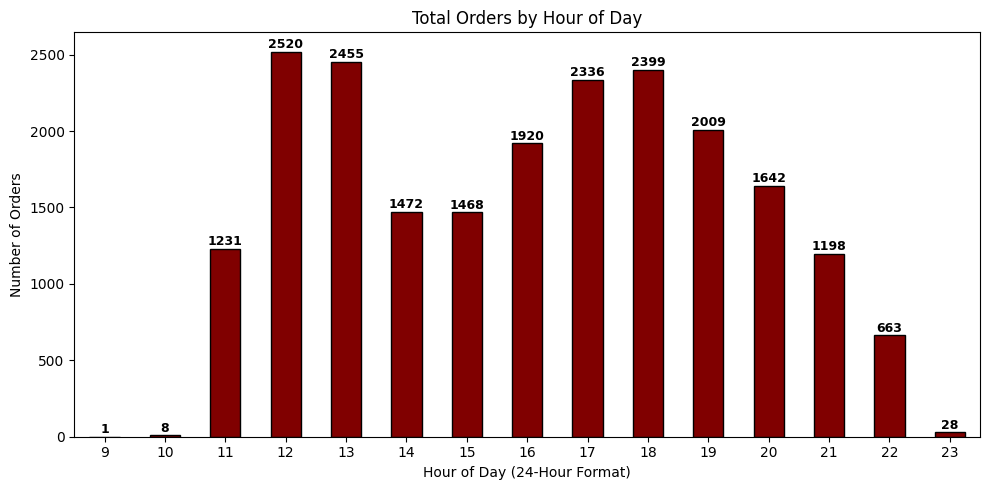

In [86]:
pf ['order_time'] = pd.to_datetime(pf['order_time'], format='%H:%M:%S')

pf['order_hour'] = pf['order_time'].dt.hour

orders_by_hour = pf.groupby('order_hour', observed=False) ['order_id'].nunique()

ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='maroon', edgecolor='black')

plt.title("Total Orders by Hour of Day")

plt.xlabel("Hour of Day (24-Hour Format)")

plt.ylabel("Number of Orders")

plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):

    plt.text(i, val+5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

plt.show()

# Monthly Trend - Total Orders


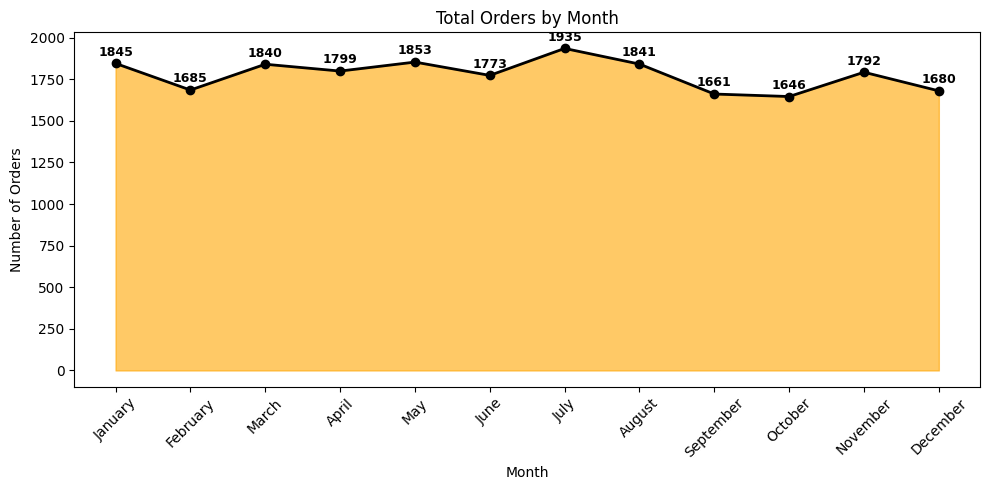

In [91]:
pf ['order_date'] = pd.to_datetime(pf['order_date'], dayfirst=True)

pf['month_name'] = pf ['order_date'].dt.month_name()

month_order = "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"

pf['month_name'] = pd.Categorical (pf['month_name'], categories=month_order, ordered=True)

orders_by_month= pf.groupby('month_name', observed=False) ['order_id'].nunique()

plt.figure(figsize=(10,5))

plt.fill_between (orders_by_month.index, orders_by_month.values, color="orange", alpha=0.6) 
plt.plot(orders_by_month.index, orders_by_month.values, color="black", linewidth=2, marker='o')

plt.title("Total Orders by Month")

plt.xlabel("Month")

plt.ylabel("Number of Orders")

plt.xticks(rotation=45)

for i, val in enumerate (orders_by_month):

    plt.text(i, val+28, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

plt.show()

# % of Sales by Category


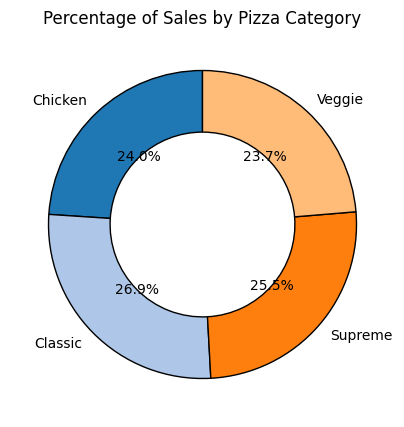

In [108]:
category_sales = pf.groupby('pizza_category')['total_price'].sum()

category_pct = category_sales / category_sales.sum() * 100

plt.figure(figsize=(5,5))

colors = plt.get_cmap('tab20').colors #nice color palette

plt.pie(category_pct, labels = category_pct.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'width':0.4})

plt.title("Percentage of Sales by Pizza Category")

plt.show()

# % Sales by Pizza Size & Category


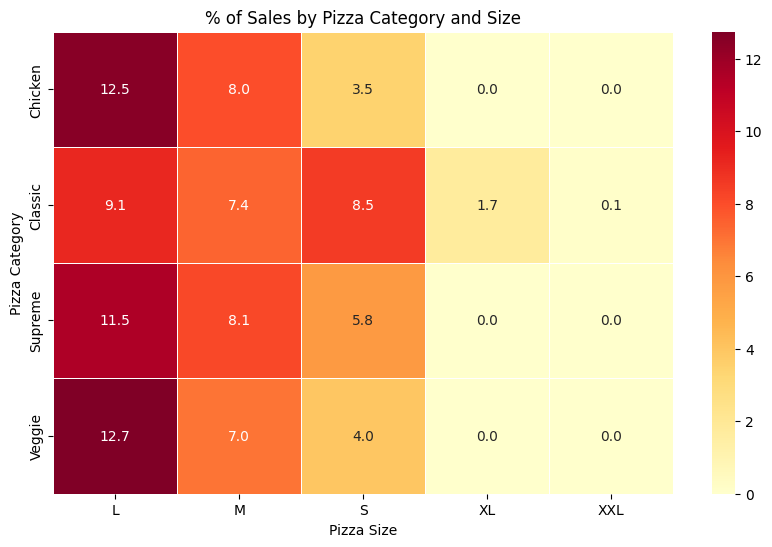

In [114]:
sales_pivot = pf.pivot_table(

    index='pizza_category',

    columns='pizza_size',

    values='total_price',

    aggfunc = 'sum',

    fill_value=0

)    

sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(10,6))

sns.heatmap(sales_pct, annot = True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)

plt.title("% of Sales by Pizza Category and Size")

plt.ylabel("Pizza Category")

plt.xlabel("Pizza Size")

plt.show()

# Total Pizza Sold by Pizza Category


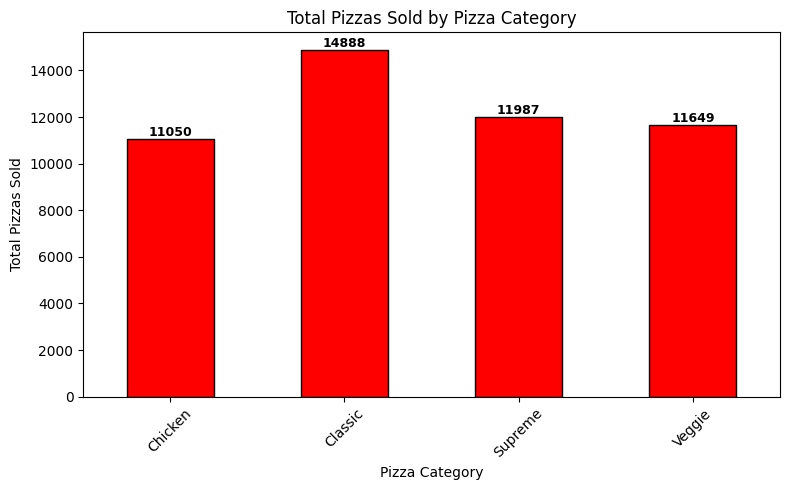

In [119]:
pizzas_by_category = pf.groupby('pizza_category') ['quantity'].sum()


ax = pizzas_by_category.plot(kind='bar', figsize=(8,5), color='red', edgecolor='black')

plt.title("Total Pizzas Sold by Pizza Category")

plt.xlabel("Pizza Category")

plt.ylabel("Total Pizzas Sold")

plt.xticks(rotation=45)

for i, val in enumerate (pizzas_by_category):

    plt.text(i, val + 5, str(val), ha='center', va="bottom", fontsize=9, fontweight='bold')

plt.tight_layout()

plt.show()

# Top 5 Best Selling Pizza- Total Quantity


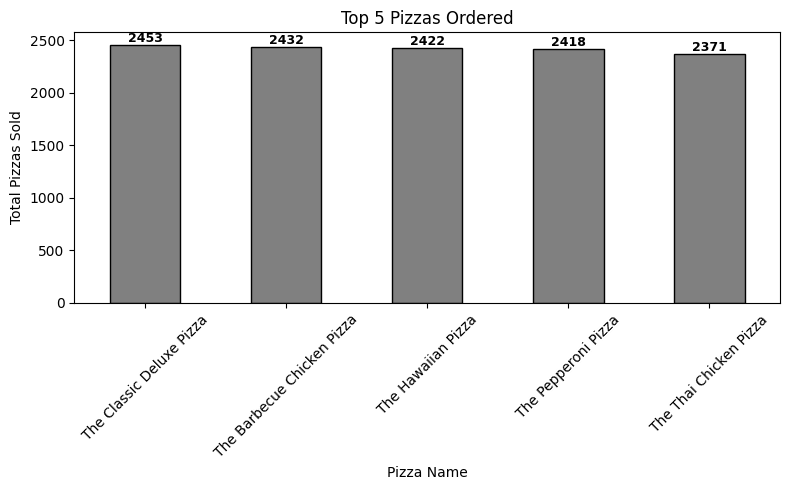

In [123]:
pizzas_by_name = pf.groupby('pizza_name') ['quantity'].sum()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar', figsize=(8,5), color='grey', edgecolor='black')

plt.title("Top 5 Pizzas Sold")

plt.xlabel("Pizza Name")

plt.ylabel("Total Pizzas Sold")

plt.xticks(rotation=45)

for i, val in enumerate (top5):

    plt.text(i, val+2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

plt.show()

# Top 5 Best Selling Pizza- Total Orders


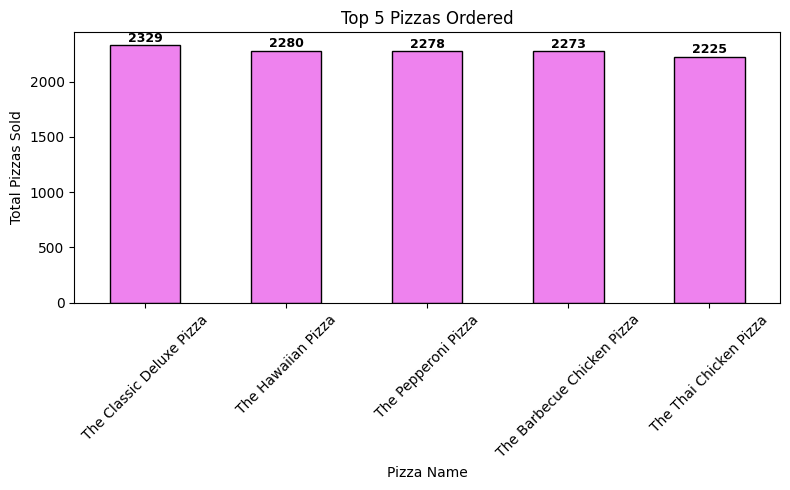

In [124]:
pizzas_by_name = pf.groupby('pizza_name') ['order_id'].nunique()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar', figsize=(8,5), color='violet', edgecolor='black')

plt.title("Top 5 Pizzas Ordered")

plt.xlabel("Pizza Name")

plt.ylabel("Total Pizzas Sold")

plt.xticks(rotation=45)

for i, val in enumerate (top5):

    plt.text(i, val+2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

plt.show()

# Top 5 Best Selling Pizza- Total Sales


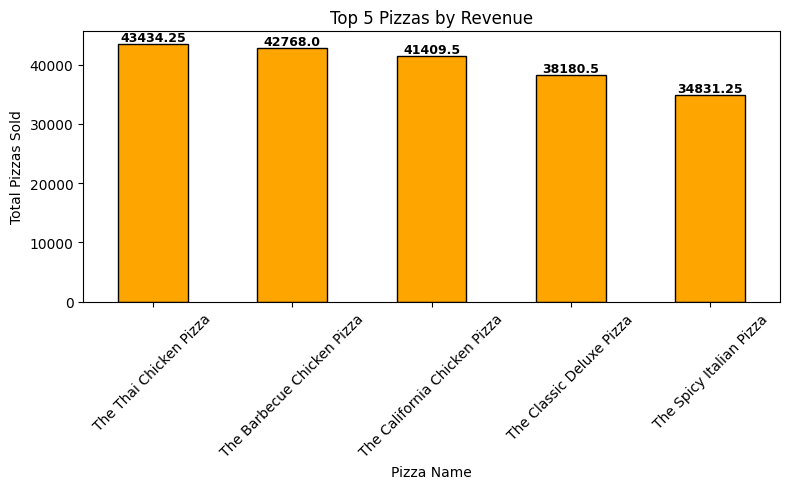

In [127]:
pizzas_by_name = pf.groupby('pizza_name') ['total_price'].sum()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar', figsize=(8,5), color='orange', edgecolor='black')

plt.title("Top 5 Pizzas by Revenue")

plt.xlabel("Pizza Name")

plt.ylabel("Total Pizzas Sold")

plt.xticks(rotation=45)

for i, val in enumerate (top5):

    plt.text(i, val+2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

plt.show()

# Bottom 5 Best Selling Pizza- Total Sales


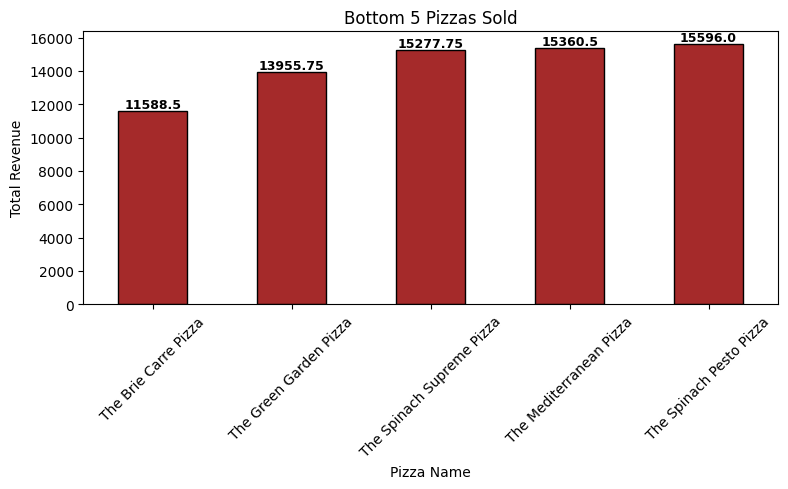

In [130]:
pizzas_by_name = pf.groupby('pizza_name') ['total_price'].sum()

bottom5 = pizzas_by_name.sort_values(ascending=True).head(5)

ax = bottom5.plot(kind='bar', figsize=(8,5), color='brown', edgecolor='black')

plt.title("Bottom 5 Pizzas Sold")

plt.xlabel("Pizza Name")

plt.ylabel("Total Revenue")

plt.xticks(rotation=45)

for i, val in enumerate (bottom5):

    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

plt.show()